In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import skrf as rf
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

In [7]:
# Reading the dataset from system.
data = pd.read_csv('/Users/Shylesh Patil/Downloads/DataScienceJobs.csv')

# Printing the Shape of my dataset (Rows*Column)
print(data.shape)

(6953, 5)


In [8]:
# Reading the first few data, to see the headings.

data.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [9]:
# To Check if there are any null value in Dataset.
data.isnull().values.any()

True

In [10]:
# As the result was True, To check which are the value null.
data.isnull()

,position,company,description,reviews,location
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [11]:
data.isnull().sum()

position          0
company           0
description       0
reviews        1627
location          0
dtype: int64

In [12]:
# As we are not going to use 'reviews' value for any of our regression or visualisation, Replacing 'null' with 'No Review'.
data["reviews"].fillna("No Reviews", inplace = True)

In [13]:
# Re-Checking the dataset for null.
data.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [14]:
# Renaming the columns as per the Naming Ethics '(Pascal Case)''
data.rename(columns=({'position':'Position','company':'Company'
                     ,'description':'Description'
                     ,'reviews':'Reviews','location':'Location'}),inplace=True)

In [15]:
# Listing out the corrected column name.
for i,col in enumerate(data.columns):
    print(i+1,". column is ",col)

1 . column is  Position
2 . column is  Company
3 . column is  Description
4 . column is  Reviews
5 . column is  Location


In [16]:
# Viewing a sample set of cleansed dataset.
data.sample(frac=0.1)

,Position,Company,Description,Reviews,Location
2036,Executive Operations Research Analyst-Must hav...,Steel Point Solutions,50% of the work can be done remotelySteel Poin...,No Reviews,"Washington, DC"
1668,"US SBD Account Executive Issuing, Central U S",Feedzai,Feedzai is AI. We’re coding the future of comm...,No Reviews,"Chicago, IL"
2914,"Sr. Scientist/Principal Scientist, X-Ray Cryst...",Blueprint Medicines,"At Blueprint Medicines, as our name indicates,...",No Reviews,"Cambridge, MA 02139"
74,DATA ANALYST SUPPLY CHAIN,The Home Depot,POSITION PURPOSE:\nA Data Analyst Supply Chain...,38844,"Atlanta, GA"
4438,GeoSpatial Data Engineer,EarthDefine,EarthDefine is seeking a GeoSpatial Data Engin...,No Reviews,"Redmond, WA"
3156,Communication System Modeling and Data Scienti...,Google,As a Communication System Modeling and Data Sc...,2474,"Mountain View, CA"
52,"VP, Data Scientist- Atlanta, GA; Charlotte, NC",Bank of America Merchant Services,Ever wonder what it takes for a business to pr...,159,"Atlanta, GA"
4643,Associate Integration Scientist 1,Illumina,As an Associate Integration Scientist 1 at Ill...,133,"San Diego, CA"
3005,"Sr Associate Scientist, Neuroscience",Biogen,The successful candidate will be performing re...,358,"Cambridge, MA"
458,Sr. Staff Data Software Engineer,Visa,Job Description\n\nWe are seeking an experienc...,605,"Austin, TX"


In [17]:
# Step 1 - Let's find out the number of companies that have job vacancies.
total_numberOf_comapanies=data['Company'].nunique()
print('Total number of Companies with Data Science Jobs =',total_numberOf_comapanies)

Total number of Companies with Data Science Jobs = 2213


In [18]:
# Step 2 - Let's find out the top 10 companies with respect to 'Number of Positions'
number_of_vacancies= data.groupby(['Company'])['Position'].count()
number_of_vacancies=number_of_vacancies.reset_index(name='Position')
number_of_vacancies=number_of_vacancies.sort_values(['Position'],ascending=False)
pareto_df=number_of_vacancies
number_of_vacancies=number_of_vacancies.head(10)
print('Top 10 Companies with highest number of Vacancies:''\n''\n',number_of_vacancies)

Top 10 Companies with highest number of Vacancies:

                                      Company  Position
122                               Amazon.com       358
230                           Ball Aerospace       187
1270                               Microsoft       137
866                                   Google       134
1328                      NYU Langone Health        77
798   Fred Hutchinson Cancer Research Center        70
1095                                    KPMG        66
1136                                  Lab126        50
748                                 Facebook        49
324                          Broad Institute        49


In [19]:
# Listing the Output
number_of_vacancies.head(10)

,Company,Position
122,Amazon.com,358
230,Ball Aerospace,187
1270,Microsoft,137
866,Google,134
1328,NYU Langone Health,77
798,Fred Hutchinson Cancer Research Center,70
1095,KPMG,66
1136,Lab126,50
748,Facebook,49
324,Broad Institute,49


In [20]:
# Step 3 - Let's find the result for Research Goal 1.
# Which Job Title has the most demand.?

number_of_roles=data.groupby(['Position'])['Company'].count()   
number_of_roles=number_of_roles.reset_index(name='Company')
number_of_roles=number_of_roles.sort_values(['Company'],ascending=False)
number_of_roles=number_of_roles.head(10)   
print('Top 10 Demanding Job Titles:''\n''\n',number_of_roles)

Top 10 Demanding Job Titles:

                        Position  Company
1026             Data Scientist      351
3833      Senior Data Scientist       96
3115           Research Analyst       64
928               Data Engineer       60
2152  Machine Learning Engineer       56
2071        Lead Data Scientist       31
3276         Research Scientist       30
4685         Sr. Data Scientist       28
2660   Principal Data Scientist       24
879                Data Analyst       22


In [21]:
# Listing the Output
number_of_roles.head(10)

,Position,Company
1026,Data Scientist,351
3833,Senior Data Scientist,96
3115,Research Analyst,64
928,Data Engineer,60
2152,Machine Learning Engineer,56
2071,Lead Data Scientist,31
3276,Research Scientist,30
4685,Sr. Data Scientist,28
2660,Principal Data Scientist,24
879,Data Analyst,22


Text(0, 0.5, 'NO OF ROLES')

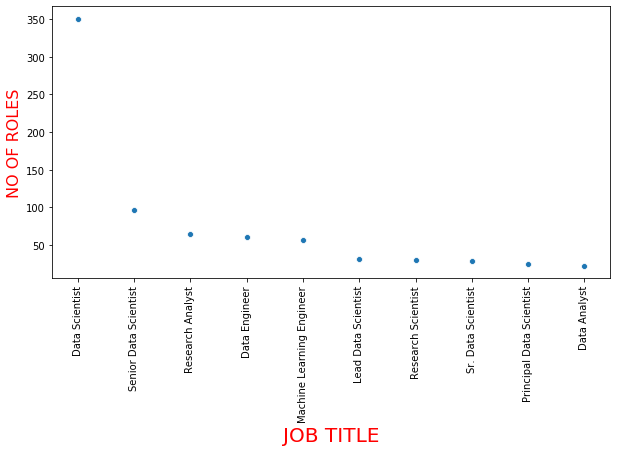

In [22]:
# Step 4 - Visulaising the output for Goal 1.
fig,ax=plt.subplots(figsize=(10,5))
ax=seaborn.scatterplot(x="Position", y="Company", data=number_of_roles)    
ax.set_xticklabels(number_of_roles['Position'],rotation=90)
ax.set_xlabel('JOB TITLE',fontsize=20,color='red')
ax.set_ylabel('NO OF ROLES',fontsize=16,color='red')#

In [23]:
# Step 5 - Let's find the solution for Research Goal 2 and 3.
# What skill set are required the most to get hired?
# Most wanted job roles vs number of Roles.
# As there are many posotions, let us first group the job positions by domain.
data1=data.copy()
data1.dropna(subset=['Position'], how='all', inplace = True)
data1['Position']=[x.upper() for x in data1['Position']]
data1['Description']=[x.upper() for x in data1['Description']]

# Grouping to 5 Major Domains
data1.loc[data1.Position.str.contains("SCIENTIST"), 'Position'] = 'Data Scientist'
data1.loc[data1.Position.str.contains('ENGINEER'),'Position']='Machine Learning Engineer'
data1.loc[data1.Position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'Position']='Machine Learning Engineer'
data1.loc[data1.Position.str.contains('PROGRAMMER'),'Position']='Machine Learning Engineer'
data1.loc[data1.Position.str.contains('DEVELOPER'),'Position']='Machine Learning Engineer'
data1.loc[data1.Position.str.contains('ANALYST'), 'Position'] = 'Data Analyst'
data1.loc[data1.Position.str.contains('STATISTICIAN'), 'Position'] = 'Data Analyst'
data1.loc[data1.Position.str.contains('MANAGER'),'Position']='Data Science Manager'
data1.loc[data1.Position.str.contains('CONSULTANT'),'Position']='Data Science Manager'
data1.loc[data1.Position.str.contains('DATA SCIENCE'),'Position']='Data Science Manager'
data1.loc[data1.Position.str.contains('DIRECTOR'),'Position']='Data Science Manager'

data1.Position=data1[(data.Position == 'Data Scientist') | (data1.Position == 'Data Analyst') | (data1.Position == 'Machine Learning Engineer') | (data1.Position == 'Data Science Manager')]
data1.Position=['Others' if x is np.nan else x for x in data1.Position]

Position=data1.groupby(['Position'])['Company'].count()   
Position=Position.reset_index(name='Company')
Position=Position.sort_values(['Company'],ascending=False)

print('Here is  the count of each new roles we created :', '\n\n', Position)


Here is  the count of each new roles we created : 

                     Position  Company
4                     Others     3589
3  Machine Learning Engineer     1384
0               Data Analyst      848
1       Data Science Manager      781
2             Data Scientist      351


Text(0, 0.5, 'NO OF ROLES')

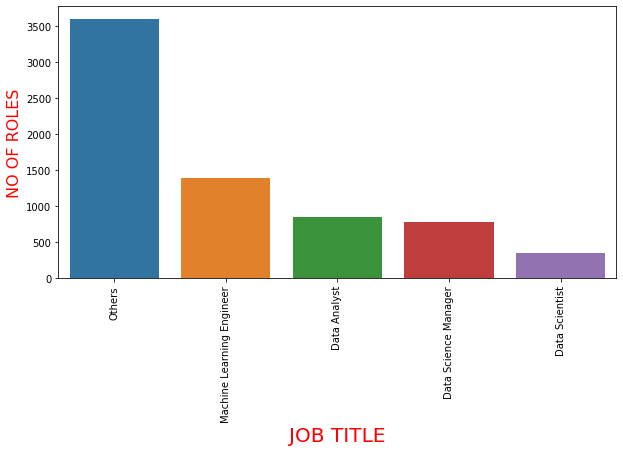

In [24]:
# Step 6 - let's Visualise the Output for Goal 2.
fig,ax=plt.subplots(figsize=(10,5))
ax=seaborn.barplot(x="Position", y="Company", data=Position)    
ax.set_xticklabels(Position['Position'],rotation=90)
ax.set_xlabel('JOB TITLE',fontsize=20,color='red')
ax.set_ylabel('NO OF ROLES',fontsize=16,color='red')

In [38]:
# Step 7 - Let's find solution for Research Goal 4.
# Which region has more job roles?

city_job=data.groupby(['Location','Company'])['Position'].count()     
city_job=city_job.reset_index()
city_job=city_job.sort_values(['Position'],ascending=False)
city_job=city_job.head(10) 

print('Job vs City''\n\n', city_job)

Job vs City

                  Location                                 Company  Position
2348          Seattle, WA                              Amazon.com       233
514           Boulder, CO                          Ball Aerospace       187
1784    Redmond, WA 98052                               Microsoft       110
1639  New York, NY 10016                       NYU Langone Health        73
2497    Seattle, WA 98109  Fred Hutchinson Cancer Research Center        70
1194    Mountain View, CA                                  Google        62
574         Cambridge, MA                              Amazon.com        50
589         Cambridge, MA                         Broad Institute        49
2580        Sunnyvale, CA                       Walmart eCommerce        43
2449          Seattle, WA                University of Washington        39


In [40]:
#Listing out the result.
city_job.head(10)

,Location,Company,Position
2348,"Seattle, WA",Amazon.com,233
514,"Boulder, CO",Ball Aerospace,187
1784,"Redmond, WA 98052",Microsoft,110
1639,"New York, NY 10016",NYU Langone Health,73
2497,"Seattle, WA 98109",Fred Hutchinson Cancer Research Center,70
1194,"Mountain View, CA",Google,62
574,"Cambridge, MA",Amazon.com,50
589,"Cambridge, MA",Broad Institute,49
2580,"Sunnyvale, CA",Walmart eCommerce,43
2449,"Seattle, WA",University of Washington,39


Text(0.5, 0, 'Company Name')

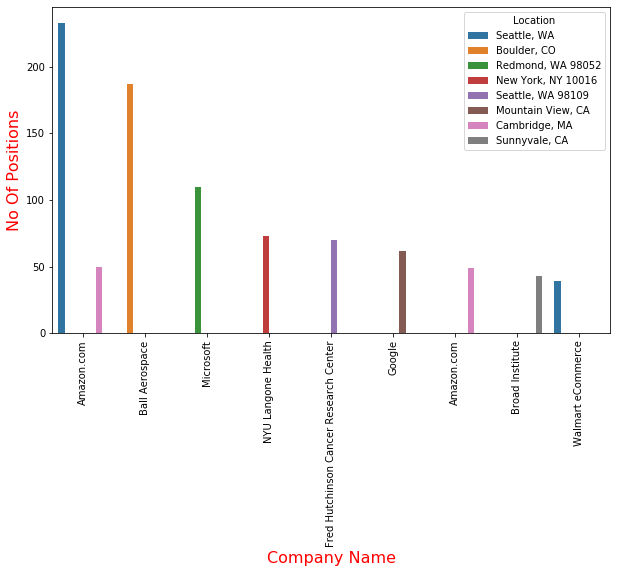

In [27]:
# Step 8 - Let's Visualise the result for Goal 4.
fig,a=plt.subplots(figsize=(10,6))             
a=seaborn.barplot(x="Company", y="Position", hue="Location", data=city_job);    
a.set_xticklabels(city_job['Company'],rotation=90)   
a.set_ylabel('No Of Positions',fontsize=16,color='red')
a.set_xlabel('Company Name',fontsize=16,color='red')  

In [29]:
# Next Part in ML Algorithm is Data Cleansing
X=data1.Description
Y=data1.Position

X=[re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in X]
X=[re.sub("[0-9]+",' ',k) for k in X]

#applying stemmer
ps =PorterStemmer()
X=[ps.stem(k) for k in X]

#Note: I have not removed stop words because there are important key words mentioned in job description which are of length 2, I feel they have weightage while classifing
tfidf=TfidfVectorizer()
label_enc=LabelEncoder()

X=tfidf.fit_transform(X)
Y=label_enc.fit_transform(Y)

x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.3)


In [30]:
# first algorithm SVM
#SVM classification
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)

svm_y=svm.predict(x_test)

print('Accuracy of SVM :', accuracy_score(y_test,svm_y))
print ('Confusion Matrix of SVM : ', '\n\n', confusion_matrix(y_test,svm_y))

#crossfold Validation of 7 folds for SVM
cross_val_SVM=sklearn.model_selection.cross_validate(svm, x_train, y=y_train,cv=7)

#print ('SVM Train fit score is : ', '\n\n', cross_val_SVM ['train_score'])
#print ('SVM TEST score is : ', '\n\n', cross_val_SVM ['test_score'])

C:\Users\Public\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVM : 0.5162991371045063
Confusion Matrix of SVM :  

 [[   0    0    0    0  255]
 [   0    0    0    0  234]
 [   0    0    0    0  105]
 [   0    0    0    0  415]
 [   0    0    0    0 1077]]


C:\Users\Public\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
#Naive Bayes classification
NB=MultinomialNB()
NB.fit(x_train,y_train)
NB_y=NB.predict(x_test)

print('Accuracy of NB :', accuracy_score(y_test,NB_y))
print ('Confusion Matrix of NB : ', '\n\n', confusion_matrix(y_test,NB_y))

#crossfold Validation of 7 folds for NB
cross_val_NB=sklearn.model_selection.cross_validate(NB, x_train, y=y_train,cv=7)

Accuracy of NB : 0.5177372962607862
Confusion Matrix of NB :  

 [[   0    0    0    0  255]
 [   0    0    0    0  234]
 [   0    0    0    0  105]
 [   0    0    0    3  412]
 [   0    0    0    0 1077]]


In [32]:
#3rd Classifier SGDC
#SGD classification
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
sgd_y=sgd.predict(x_test)

print('Accuracy of SGD :', accuracy_score(y_test,sgd_y))
print ('Confusion Matrix of SGD : ', '\n\n', confusion_matrix(y_test,sgd_y))

#crossfold Validation of 7 folds for SGD
cross_val_SGD=sklearn.model_selection.cross_validate(sgd, x_train, y=y_train,cv=7)

Accuracy of SGD : 0.7689357622243528
Confusion Matrix of SGD :  

 [[193   6   3   6  47]
 [  7 137   2  14  74]
 [  4   1  14   8  78]
 [  6   6   0 341  62]
 [ 24  50  31  53 919]]
